In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
print("Size of training data :",df.shape)

#size of test dataset
print("Size of test data :",df_test.shape)

Size of training data : (10886, 12)
Size of test data : (6493, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.datetime = pd.to_datetime(df.datetime)

df_test.datetime = pd.to_datetime(df_test.datetime)

In [ ]:
df['Year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

#same process for test data
df_test['Year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['hour'] = df_test['datetime'].dt.hour

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


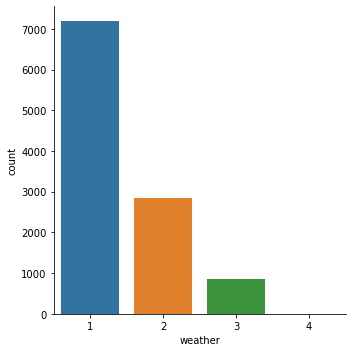

In [ ]:
print(df['weather'].value_counts())
sns.catplot(x='weather',data=df,kind='count')

0    10575
1      311
Name: holiday, dtype: int64


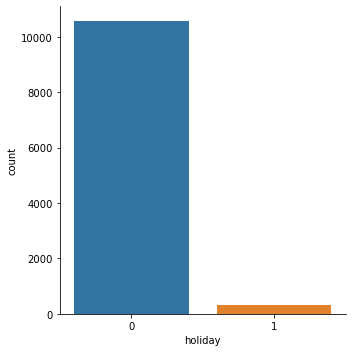

In [ ]:
# count of unique values in holiday columns
print(df['holiday'].value_counts())
sns.catplot(x='holiday',data=df,kind='count')

1    7412
0    3474
Name: workingday, dtype: int64


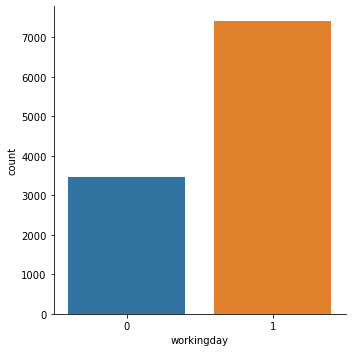

In [ ]:
#count of unique values in workingday column
print(df['workingday'].value_counts())
sns.catplot(x='workingday',data=df,kind='count')

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


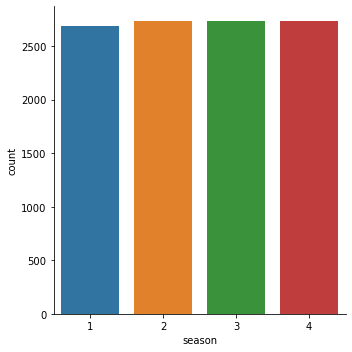

In [ ]:
#count of unique values in season column
print(df['season'].value_counts())
sns.catplot(x='season',data=df,kind='count')

<AxesSubplot:xlabel='atemp', ylabel='count'>

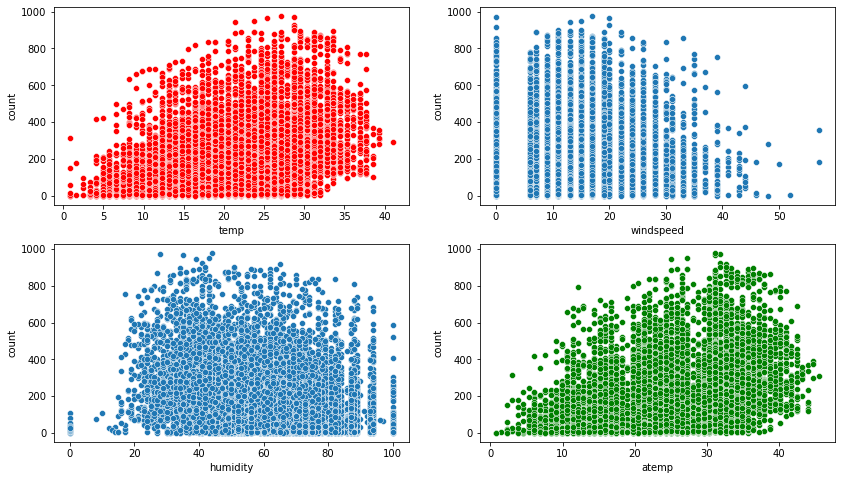

In [ ]:
# to plot multiple plot using subplot
fig,(ax1,ax2) = plt.subplots(2,2)
#set fig size in inches
fig.set_size_inches(14, 8)

# scatterplot of temp,windspeed,humidity,atemp w.r.t count
sns.scatterplot(x="temp", y="count", data=df,ax=ax1[0],color='red')
sns.scatterplot(x="windspeed", y="count", data=df,ax=ax1[1])
sns.scatterplot(x="humidity", y="count", data=df,ax=ax2[0])
sns.scatterplot(x="atemp", y="count", data=df,ax=ax2[1],color='green')

<AxesSubplot:xlabel='month', ylabel='count'>

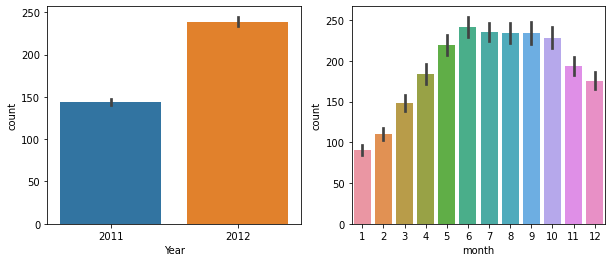

In [ ]:
#year wise and monthwise count(target variable)
fig,ax = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)
sns.barplot(data=df,x='Year',y='count',ax=ax[0])
sns.barplot(data=df,x='month',y='count',ax=ax[1])

<AxesSubplot:xlabel='hour', ylabel='count'>

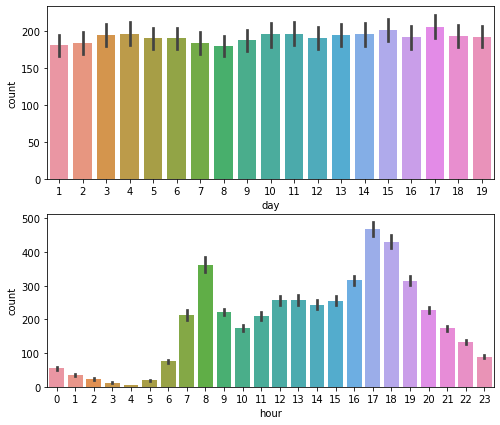

In [ ]:
# no. of rentels very day and every hour
fig,(ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(8, 7)
sns.barplot(data=df,x='day',y='count',ax=ax1)
sns.barplot(data=df,x='hour',y='count',ax=ax2)

<AxesSubplot:xlabel='month', ylabel='registered'>

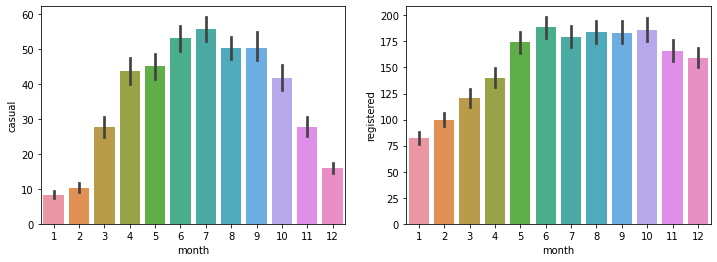

In [ ]:
#monthwise trend of casual and registered count
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(data=df,x='month',y='casual',ax=ax1)
sns.barplot(data=df,x='month',y='registered',ax=ax2)

In [ ]:
# removing target column from train data and stroing into another variable.
y = df['count']
df.drop('count',axis=1,inplace=True)
df.drop('datetime',axis=1,inplace=True)
df.drop('casual',axis=1,inplace=True)
df.drop('registered',axis=1,inplace=True)

In [ ]:
#just storing df to a new variable x for further use
x = df
#
df['Year'] = df['Year'].map({2011:0,2012:1})

df_test['Year'] = df_test['Year'].map({2011:0,2012:1})

KeyError: 'Year'

In [ ]:
#splitting dataset to train and test dataset with test data 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

NameError: name 'x' is not defined